In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import shap


In [14]:
np.random.seed(42)
data = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100)
})
data.loc[95:99, ['feature1', 'feature2']] = np.random.uniform(low=-10, high=10, size=(5, 2))


In [20]:
features = data.columns  # Keep track of the feature columns
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(data)


IsolationForest(contamination=0.05, random_state=42)

In [21]:
anomaly_scores = model.decision_function(data)
data['anomaly'] = model.predict(data)
data['anomaly_score'] = anomaly_scores

In [22]:
explainer = shap.Explainer(model, data[features])
shap_values = explainer(data[features])


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


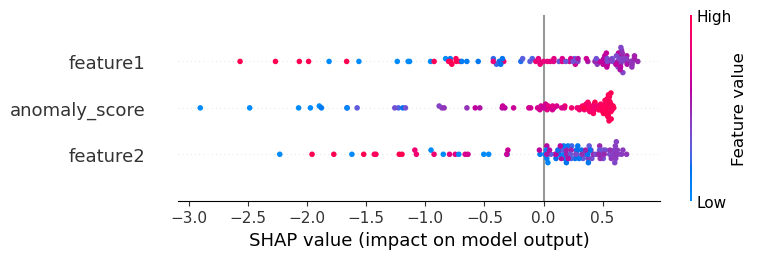

In [23]:
shap.summary_plot(shap_values, data[features], plot_type="dot")


In [24]:
data

,feature1,feature2,anomaly_score,anomaly
0,0.496714,-1.415371,0.176110,1
1,-0.138264,-0.420645,0.223540,1
2,0.647689,-0.342715,0.199902,1
3,1.523030,-0.802277,0.154191,1
4,-0.234153,-0.161286,0.223565,1
...,...,...,...,...
95,7.547461,4.815372,-0.108341,-1
96,3.940315,4.049682,-0.090580,-1
97,-2.810177,-4.128163,-0.156677,-1
98,6.187223,6.202268,-0.103003,-1


In [8]:
from pygam import s, ExpectileGAM